Summary : using a surrogate to show how the homeostasis recovers from a deviation to equiprobability. Little nb_quant, slower decrease of coeffs. Homeostasis should work better.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(precision=6, suppress=True, threshold=np.inf)
%load_ext autoreload
%autoreload 2

### 1. Learning a good dictionnary

In [2]:
DEBUG_DOWNSCALE, verbose = 1, 10

do_sym = False
C = 5
n_dictionary = 18**2
nb_quant = 128

downscale = 1#0

N_image = 10000//downscale
l0_sparseness = 10
N_boost=n_dictionary//2 
K_boost = 4.
rho_coeff = .9
do_plots = False
i_sample = 13

Extracting data..Fda_urb404.jpg, Hdn_objn23.jpg, Hdn_natu369.jpg, Mdn_for72.jpg, Bdn_nat219.jpg, Bdn_text6.jpg, Hda_obj5.jpg, Mda_urb659.jpg, Hdn_objn221.jpg, Fdn_nat155.jpg, Fdn_nat297.jpg, Hdn_N124002.jpg, Mda_archi422.jpg, Fdn_land241.jpg, Fda_art1180.jpg, Mdn_nat1196.jpg, Bda_int770.jpg, Hdn_objn32.jpg, Bdn_natu419.jpg, Bda_int211.jpg, Fda_osun36.jpg, Hda_int453.jpg, Mda_art599.jpg, Fda_art1684.jpg, Mdn_natu462.jpg, Bdn_text4.jpg, Fdn_natu649.jpg, Hdn_objn66.jpg, Mda_urb214.jpg, Mda_art1312.jpg, Bdn_nat463.jpg, Bdn_nat1157.jpg, Mda_urb556.jpg, Bda_room133.jpg, Fda_art1204.jpg, Hdn_objn202.jpg, Hdn_objn35.jpg, Hdn_natu805.jpg, Mda_art573.jpg, Mda_archi289.jpg, Bdn_natu393.jpg, Hda_obj94.jpg, Bdn_text18.jpg, Mda_archi42.jpg, Bda_art1168.jpg, Bdn_for51.jpg, Fdn_land293.jpg, Bdn_nat1006.jpg, Mdn_text113.jpg, Hdn_land840.jpg, Bda_art1147.jpg, Fdn_open19.jpg, Fdn_bea5.jpg, Hdn_N152064.jpg, Hdn_objn80.jpg, Mdn_for135.jpg, Bdn_text83.jpg, Mda_archi100.jpg, Mdn_for22.jpg, Mdn_land53.jpg, Md

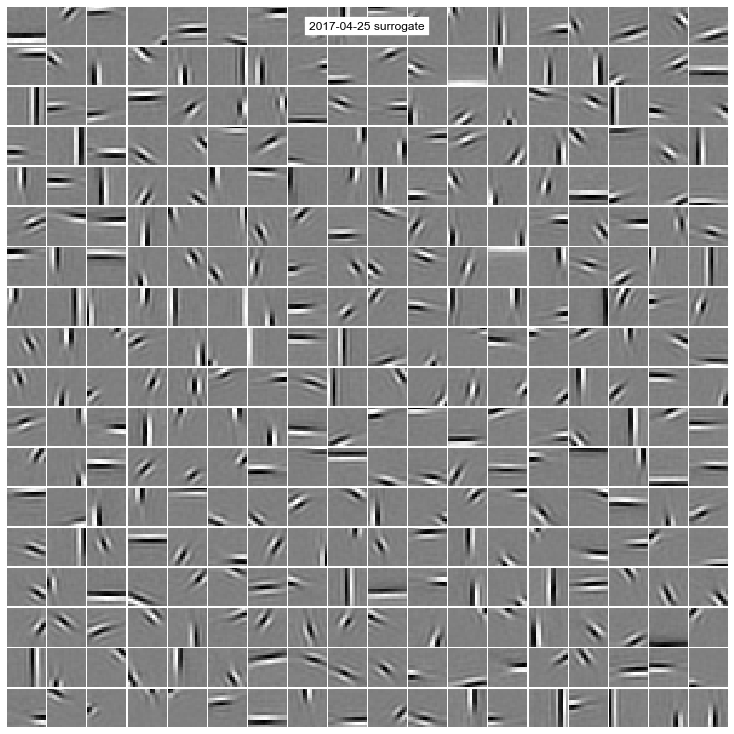

In [3]:
from shl_scripts.shl_experiments import SHL
list_figures  = ['show_dico']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
shl = SHL(n_dictionary=n_dictionary, DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, C=C, do_sym=do_sym, nb_quant=nb_quant)
data = shl.get_data()
dico = shl.learn_dico(data=data, matname='2017-04-25 surrogate', list_figures=list_figures)

### 1.0 Analysis of present coding

### 2. Generate an image from the dictionary

#### 2.1. Generate a random sparse vector

In [4]:
from shl_scripts.shl_tools import generate_sparse_vector
sparse_vector, rho_vector = generate_sparse_vector(N_image, l0_sparseness, dico.n_dictionary, N_boost=N_boost, K_boost=K_boost, rho_coeff=rho_coeff)
print ('Sparse vector = \n', sparse_vector[i_sample, : ], ' and the respetive rho of each coeff \n', rho_vector[i_sample, : ])
print('List of non-zero coeffficients given by their addresses', np.nonzero(sparse_vector[i_sample, : ]))

Sparse vector = 
 [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  12.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.748     

In [5]:
print ('Rho of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(sparse_vector[i_sample, : ]) ] )

Rho of each non-zero coeffficients given by their addresses [[ 1.        0.990741  0.993827  0.978395  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]


#### 2.2. Generate an Image as a linear combination of the sparse vector and the dictionary

In [6]:
def generate_images(dico, vector):
    image = dico.dictionary.T @ vector.T
    return image.T

image = generate_images(dico, sparse_vector)
print(image.shape)

(10000, 256)


#### 2.3. Plot the image

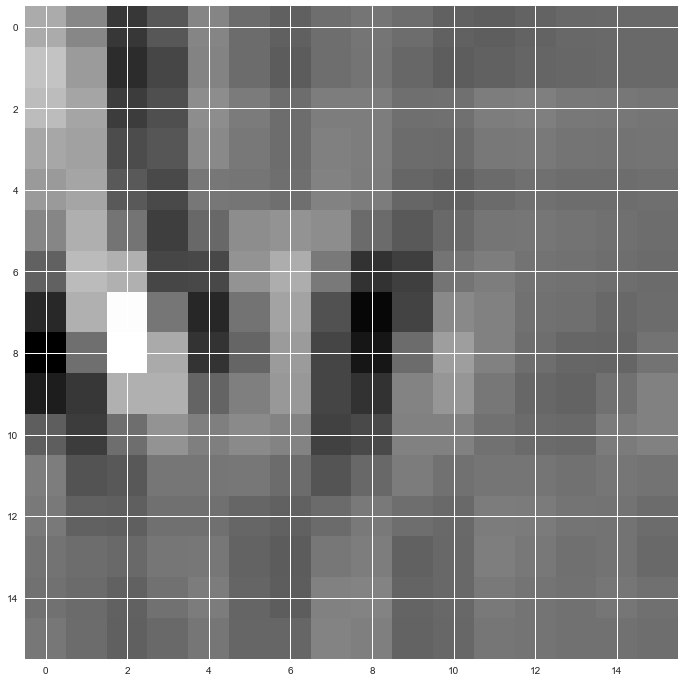

In [7]:
n_pixels = dico.dictionary.shape[1]
n_pixels_sqrt = int(np.sqrt(n_pixels))
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image[i_sample, :].reshape(n_pixels_sqrt, n_pixels_sqrt), cmap='gray', interpolation="nearest")
plt.show()

### 3. Matching Pursuit Coding of the synthetic image

In [8]:
from shl_scripts.shl_encode import mp 
mp_sparse_code = mp(image, dico.dictionary, l0_sparseness, verbose=True, C=C, do_sym=do_sym)
mp_sparse_code.shape

coding duration : 3.0785841941833496


(10000, 324)

In [9]:
print('Sparse vector = ', mp_sparse_code[i_sample, : ])
print('List of non-zero coeffficients given by their addresses', np.nonzero(sparse_vector[i_sample, : ]))
print('List of non-zero coeffficients given by their addresses', np.nonzero(mp_sparse_code[i_sample, :]))

Sparse vector =  [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  13.525116   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.536976   

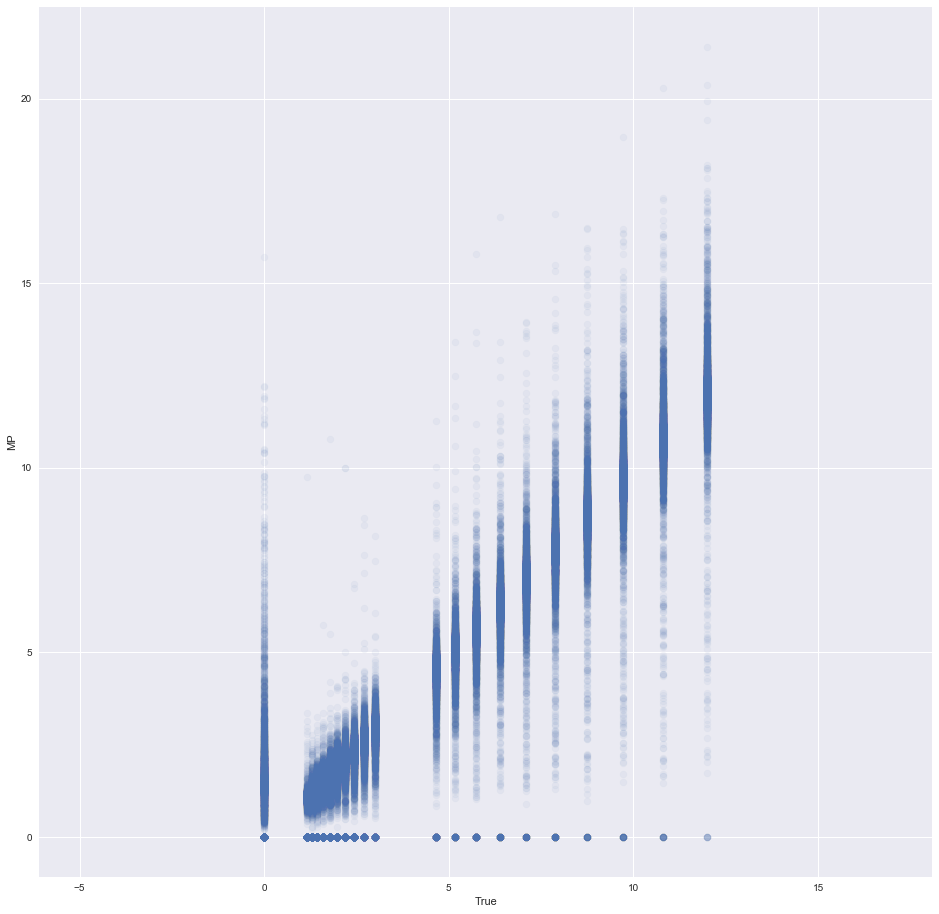

In [10]:
from shl_scripts.shl_tools import plot_scatter_MpVsTrue

plot_scatter_MpVsTrue(sparse_vector, mp_sparse_code);

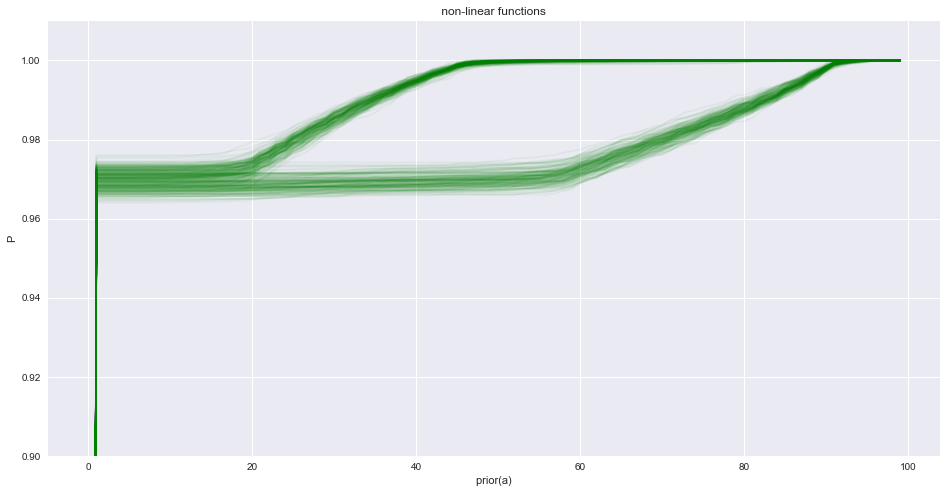

In [11]:
from shl_scripts.shl_learn import get_P_cum
from shl_scripts.shl_tools import plot_P_cum
fig, ax = plot_P_cum(get_P_cum(mp_sparse_code, C=C, do_sym=do_sym))
ax.set_ylim(0.9, 1.01);

coding duration : 3.097398042678833


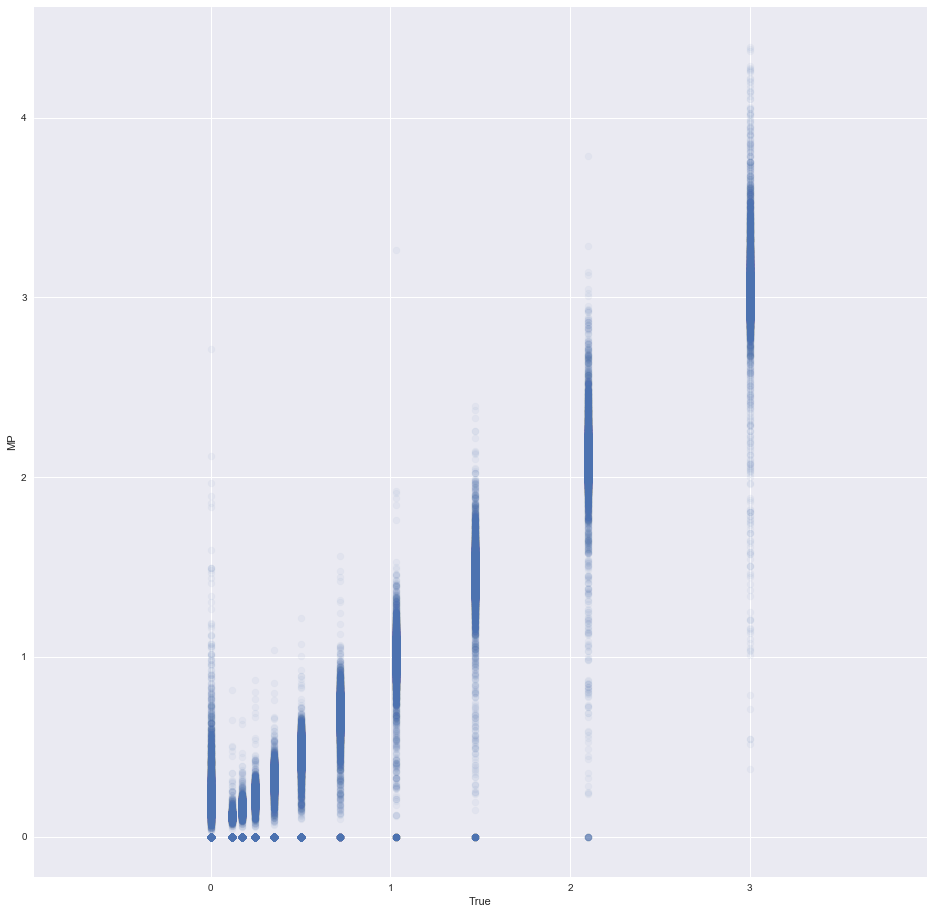

In [12]:
sparse_vector_, rho_vector_ = generate_sparse_vector(N_image, l0_sparseness, dico.n_dictionary, rho_coeff=.7, N_boost=0, K_boost=1., seed=420, do_sym=do_sym)
image_ = generate_images(dico, sparse_vector_)
mp_sparse_code_ = mp(image_, dico.dictionary, l0_sparseness, verbose=True, C=C, do_sym=do_sym)
plot_scatter_MpVsTrue(sparse_vector_, mp_sparse_code_);

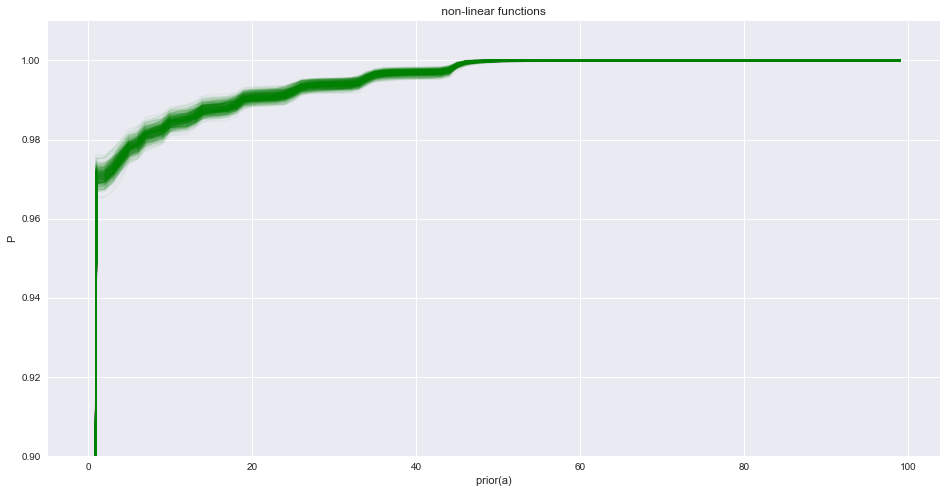

In [13]:
fig, ax = plot_P_cum(get_P_cum(mp_sparse_code_, C=C, do_sym=do_sym))
ax.set_ylim(0.9, 1.01);

In [14]:
print ('Ranks of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(sparse_vector[i_sample, : ]) ] )
print ('Ranks of each non-zero coeffficients given by their addresses', rho_vector[i_sample, np.nonzero(mp_sparse_code[i_sample, : ]) ] )
from scipy.stats import spearmanr
print ('Spearman coeficient ', spearmanr(sparse_vector[:2, : ], mp_sparse_code[:2, : ], axis=1) )
spearR = [spearmanr(sparse_vector[i_test, : ], mp_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Ranks of each non-zero coeffficients given by their addresses [[ 1.        0.990741  0.993827  0.978395  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]
Ranks of each non-zero coeffficients given by their addresses [[ 1.        0.990741  0.993827  0.978395  0.987654  0.996914  0.984568
   0.975309  0.972222  0.981481]]
Spearman coeficient  SpearmanrResult(correlation=array([[ 1.      , -0.031837,  0.800548, -0.031837],
       [-0.031837,  1.      , -0.031837,  1.      ],
       [ 0.800548, -0.031837,  1.      , -0.031837],
       [-0.031837,  1.      , -0.031837,  1.      ]]), pvalue=array([[ 0.      ,  0.568005,  0.      ,  0.568005],
       [ 0.568005,  0.      ,  0.568005,  0.      ],
       [ 0.      ,  0.568005,  0.      ,  0.568005],
       [ 0.568005,  0.      ,  0.568005,  0.      ]]))
Spearman coeficient  0.951436522056 +/- 0.07556245368


In [15]:
spearR = [spearmanr(rho_vector[i_test, : ], mp_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  0.950896177993 +/- 0.075935091757


In [16]:
spearR = [spearmanr(rho_vector[i_test, np.nonzero(sparse_vector[i_test, : ])], 
                    mp_sparse_code[i_test, np.nonzero(sparse_vector[i_test, : ]) ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  nan +/- nan


In [17]:
from shl_scripts.shl_tools import plot_proba_histogram
from shl_scripts.shl_encode import z_score, prior
C = 5
n_samples, nb_filter = mp_sparse_code.shape
P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
stick = np.arange(dico.n_dictionary)*nb_quant

In [18]:
rho_sparse_code = z_score(P_cum, prior(mp_sparse_code, C=C), stick)
print('Sparse vector = ', mp_sparse_code[i_sample, : ])
print('rho_true vector = ', rho_vector[i_sample, : ])
print('rho_hat  vector = ', rho_sparse_code[i_sample, : ])
spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Sparse vector =  [  0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
  13.525116   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         8.536976   

Spearman coeficient  0.950895912237 +/- 0.0759361804744


In [19]:
help(spearmanr)

Help on function spearmanr in module scipy.stats.stats:

spearmanr(a, b=None, axis=0, nan_policy='propagate')
    Calculates a Spearman rank-order correlation coefficient and the p-value
    to test for non-correlation.
    
    The Spearman correlation is a nonparametric measure of the monotonicity
    of the relationship between two datasets. Unlike the Pearson correlation,
    the Spearman correlation does not assume that both datasets are normally
    distributed. Like other correlation coefficients, this one varies
    between -1 and +1 with 0 implying no correlation. Correlations of -1 or
    +1 imply an exact monotonic relationship. Positive correlations imply that
    as x increases, so does y. Negative correlations imply that as x
    increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-values are not

In [20]:
rho_sparse_code[rho_sparse_code==0] = np.nan
spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ], nan_policy='omit')[0] for i_test in range(N_image) ]
print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )

Spearman coeficient  0.457907272727 +/- 0.295074565262


mean Errors per image =  0.3653
Spearman coeficient  0.950896177993 +/- 0.075935091757
Spearman coeficient  0.457907272727 +/- 0.295074565262


(0.45790727272727272, 0.29507456526242726)

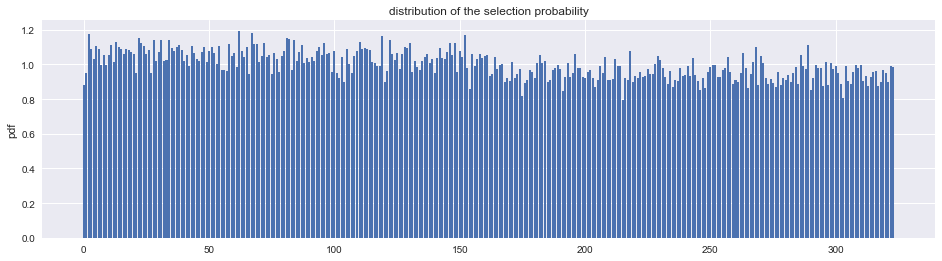

In [21]:
def evaluate(P_cum, my_sparse_code):
    print('mean Errors per image = ', np.sum(1 - ((np.abs(my_sparse_code)>0)*1) == sparse_vector) / N_image )
    fig, ax = plot_proba_histogram(my_sparse_code)
    rho_sparse_code = z_score(P_cum, prior(my_sparse_code, C=C), stick)
    spearR = [spearmanr(rho_vector[i_test, : ], my_sparse_code[i_test, : ])[0] for i_test in range(N_image) ]
    print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )
    rho_sparse_code[rho_sparse_code==0] = np.nan
    spearR = [spearmanr(rho_vector[i_test, : ], rho_sparse_code[i_test, : ], nan_policy='omit')[0] for i_test in range(N_image) ]
    print ('Spearman coeficient ', np.mean(spearR), '+/-', np.std(spearR) )
    return np.mean(spearR), np.std(spearR)
    
evaluate(P_cum, mp_sparse_code)    

### 4. Pcum Coding of the synthetic image

Learning step 0
mean Errors per image =  0.3716
Spearman coeficient  0.949762485244 +/- 0.0762368551887
Spearman coeficient  0.457913371212 +/- 0.295674321545
Learning step 200
mean Errors per image =  0.3653
Spearman coeficient  0.951351224313 +/- 0.0764942626073
Spearman coeficient  0.457627132035 +/- 0.29435853416
Learning step 400
mean Errors per image =  0.3688
Spearman coeficient  0.95107662439 +/- 0.0772073830055
Spearman coeficient  0.458055535714 +/- 0.294023390128
Learning step 600
mean Errors per image =  0.3733
Spearman coeficient  0.950836526002 +/- 0.0778949787614
Spearman coeficient  0.458781287879 +/- 0.293615943134
Learning step 800
mean Errors per image =  0.3796
Spearman coeficient  0.950586513196 +/- 0.0793673988671
Spearman coeficient  0.459666255411 +/- 0.293237146105
Learning step 1000
mean Errors per image =  0.3884
Spearman coeficient  0.950157708971 +/- 0.0808073454771
Spearman coeficient  0.460728127706 +/- 0.292749759503
Learning step 1200
mean Errors per im

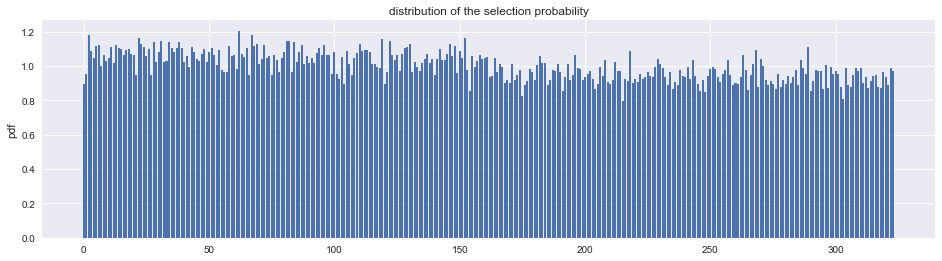

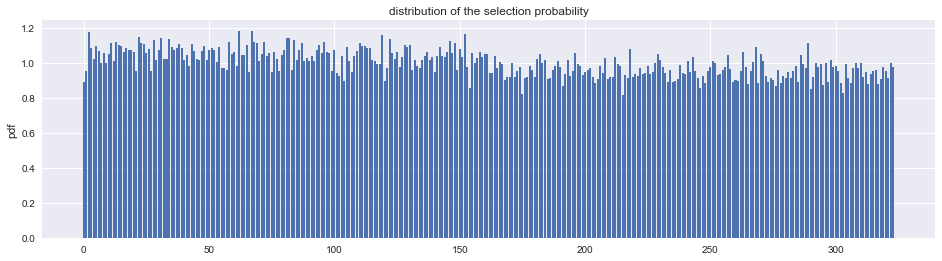

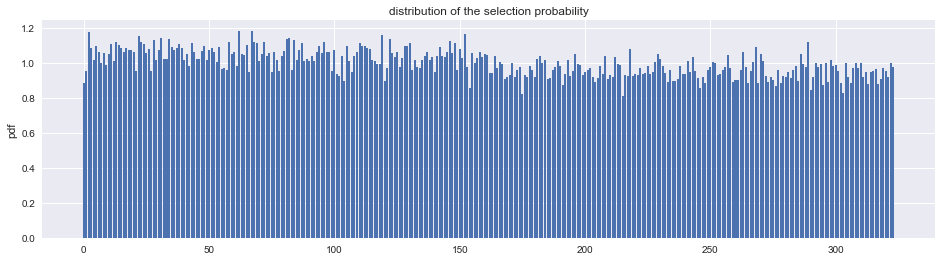

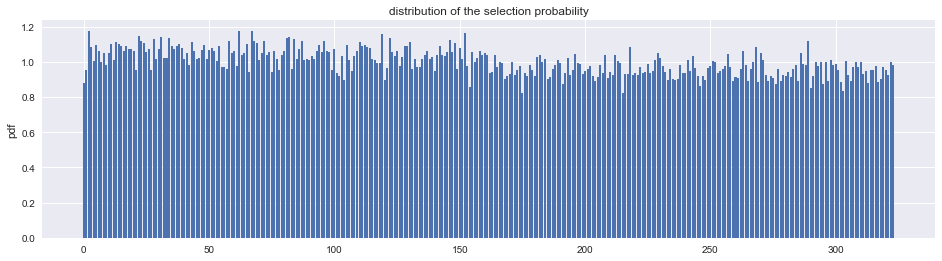

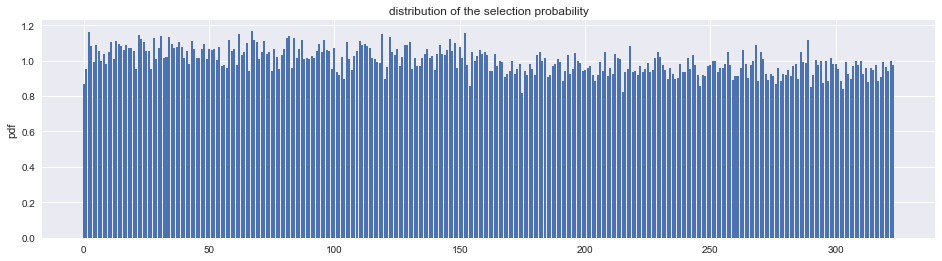

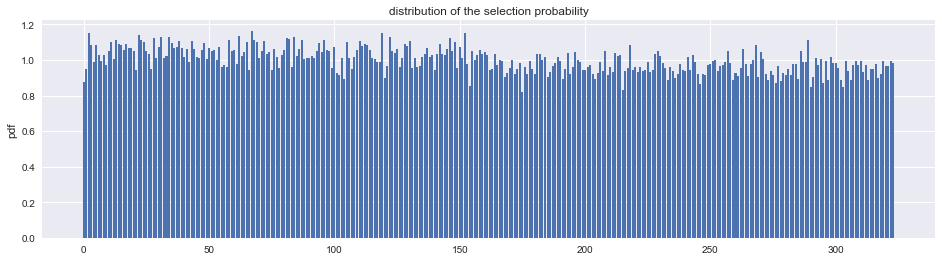

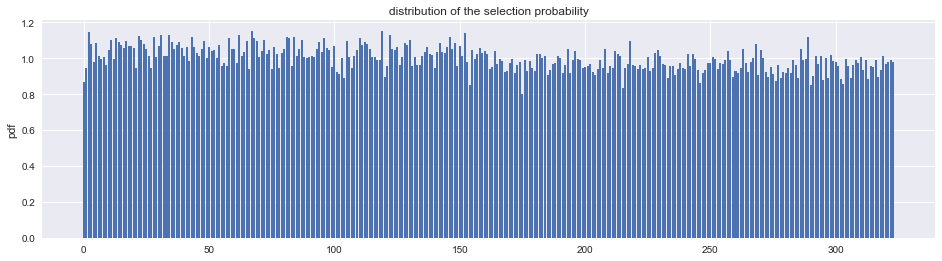

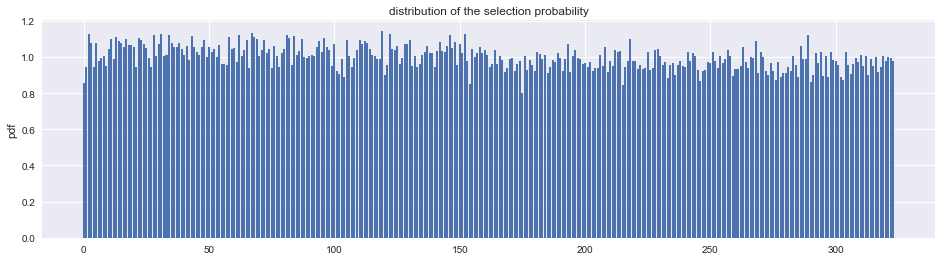

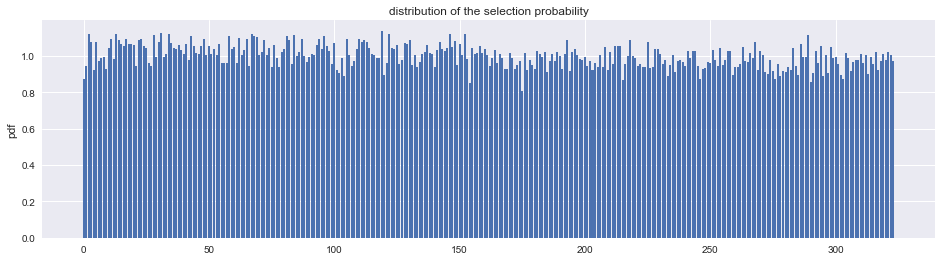

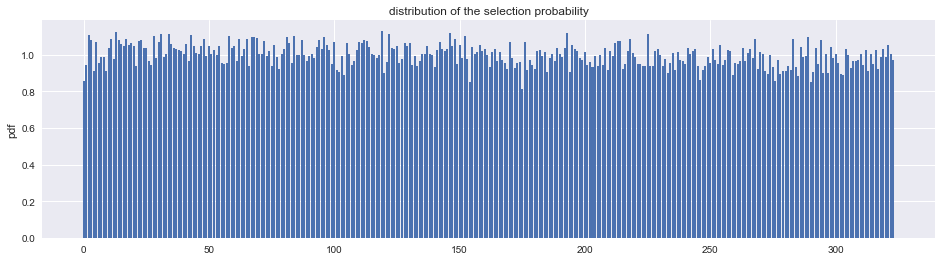

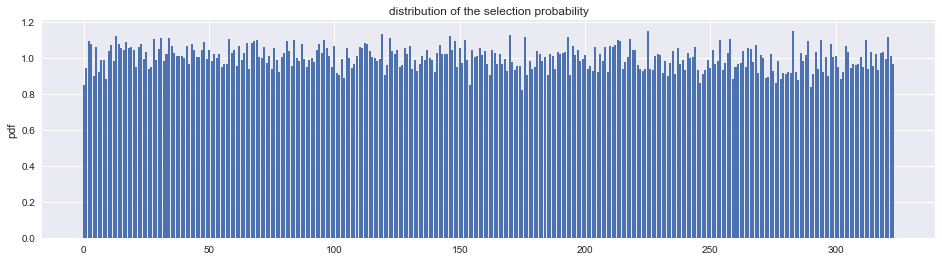

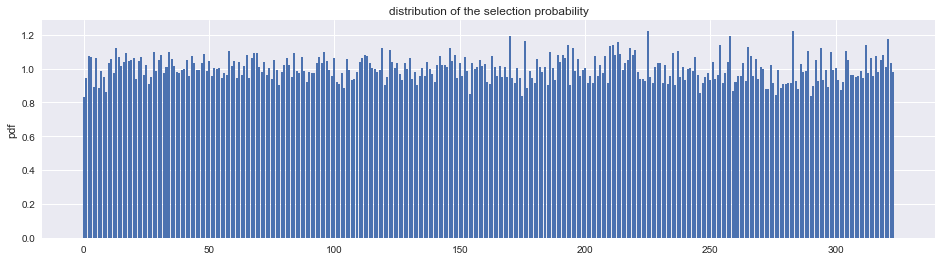

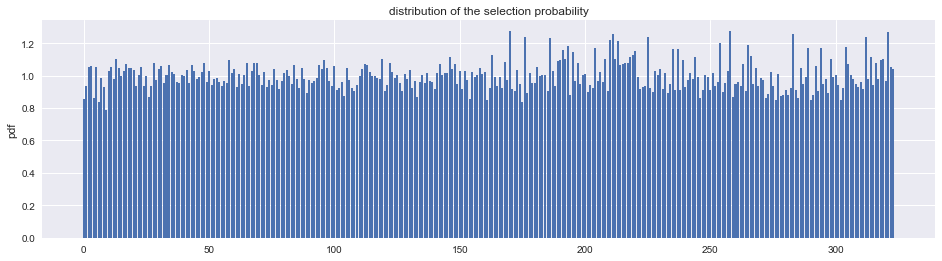

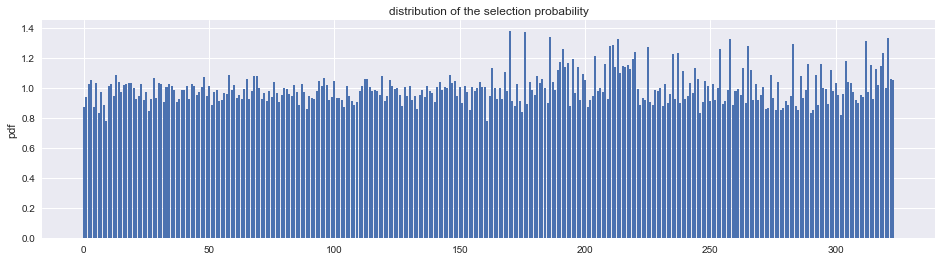

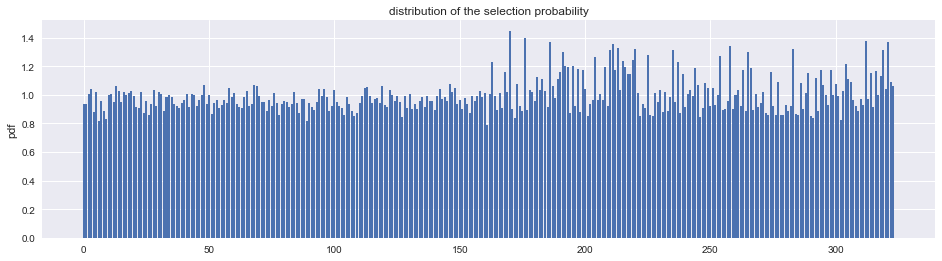

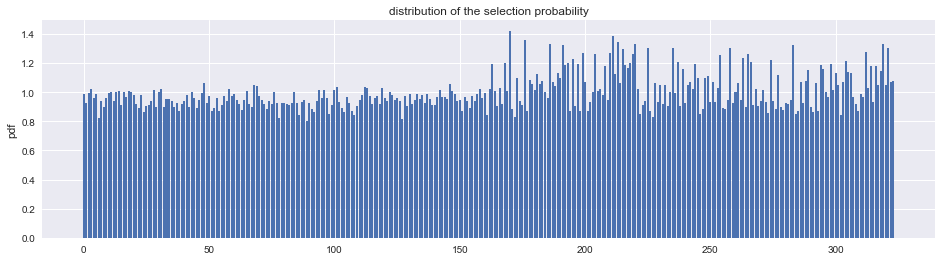

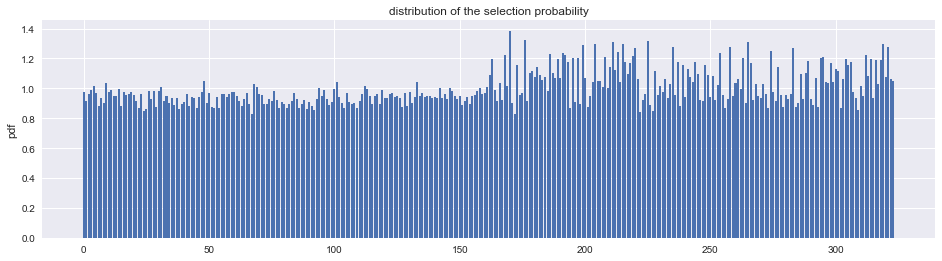

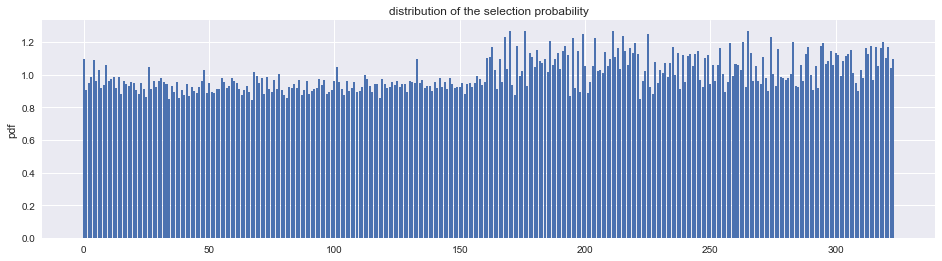

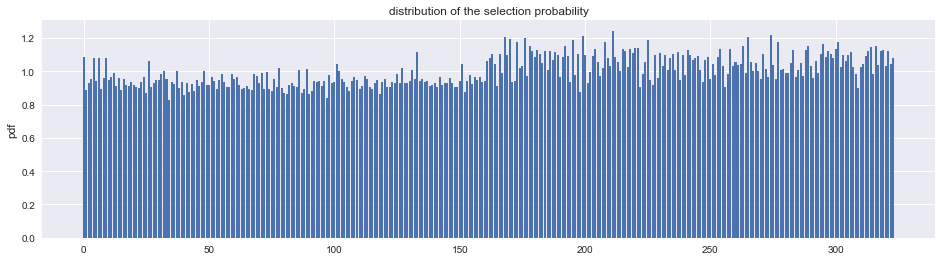

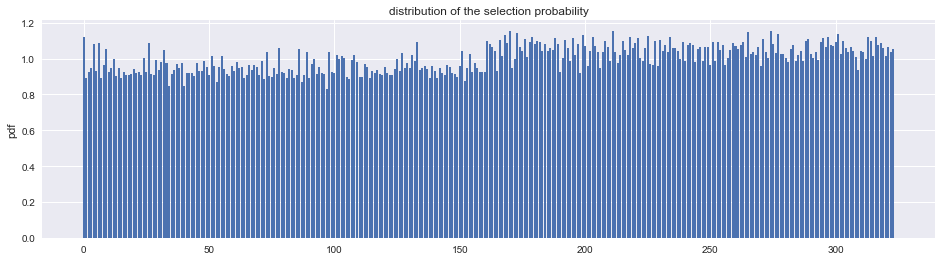

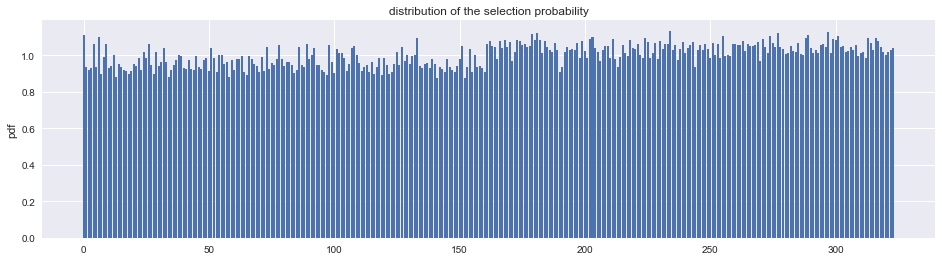

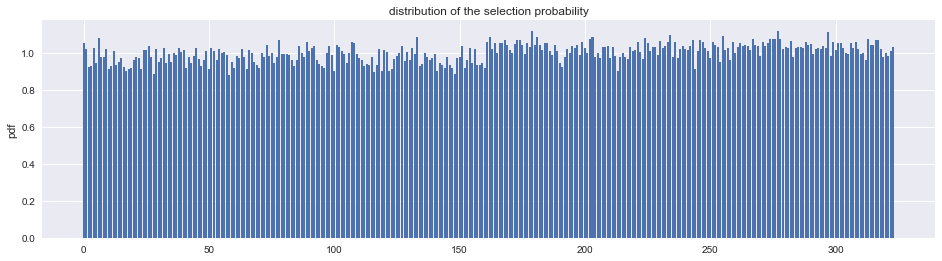

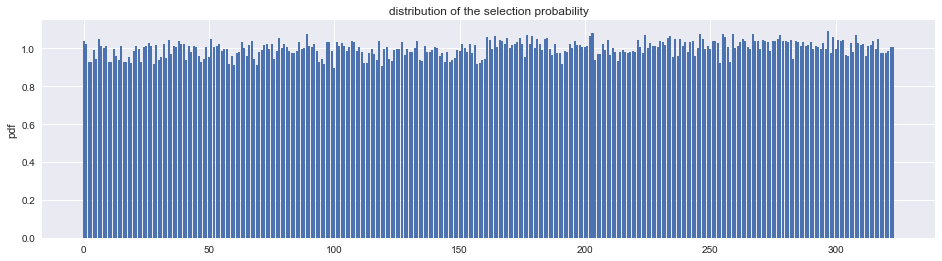

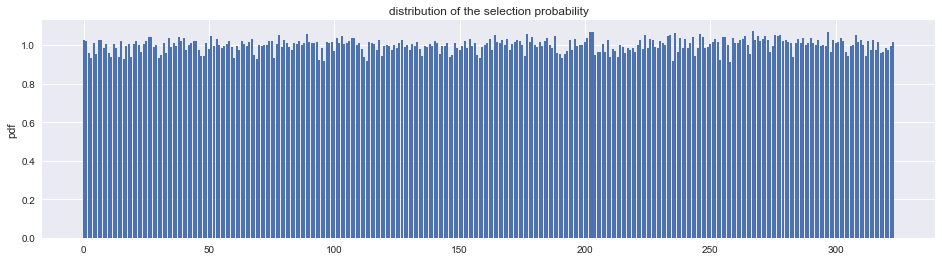

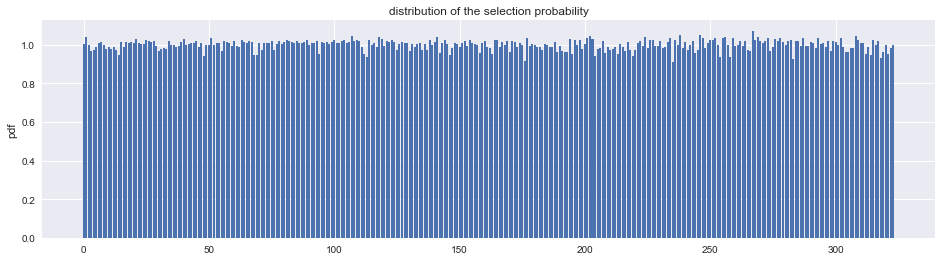

In [22]:
from shl_scripts.shl_learn import update_P_cum

eta_homeo = .001*downscale

result = []
for i in range(5000//downscale):
    Pcum_sparse_code = mp(image, dico.dictionary, l0_sparseness, P_cum=P_cum, C=C, do_sym=do_sym)
    P_cum = update_P_cum(P_cum, code=Pcum_sparse_code, eta_homeo=eta_homeo, nb_quant=nb_quant, C=C, do_sym=do_sym, verbose=False)
    if i % (200//downscale) == 0:
        print('Learning step', i)
        result.append([i, evaluate(P_cum, Pcum_sparse_code)])


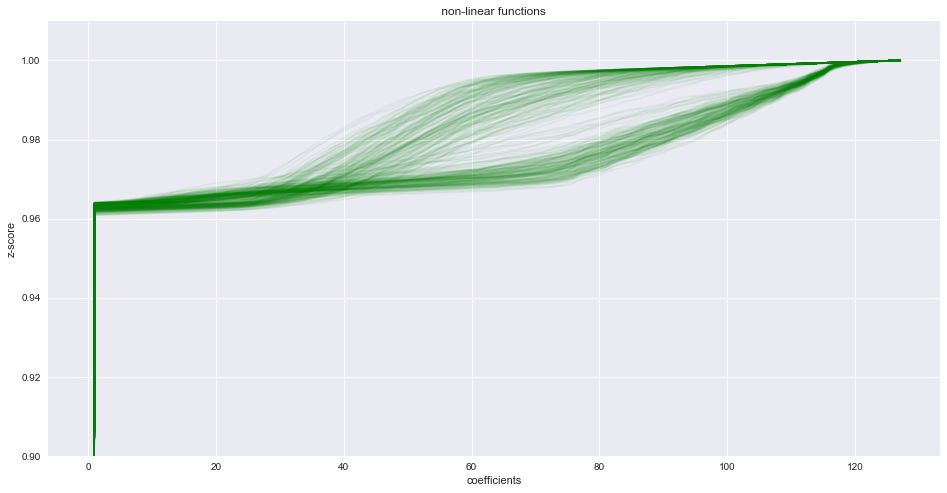

In [23]:
#P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
fig, ax = plot_P_cum(P_cum, verbose=False);
ax.set_ylim(0.9, 1.01);

### conclusion: plots

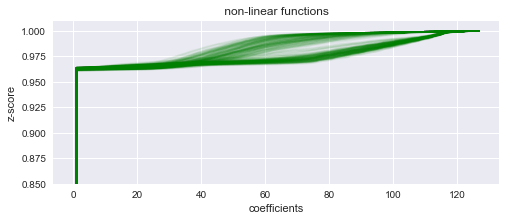

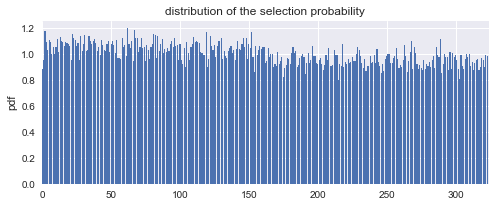

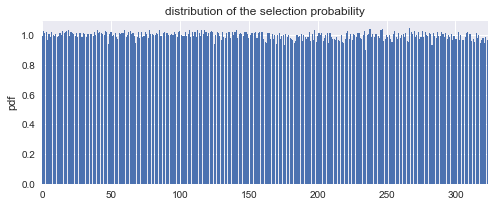

In [24]:
if do_plots:
    figsize = (8, 3)
    from shl_scripts.shl_tools import plot_P_cum
    #P_cum = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((nb_filter, 1))
    fig, ax = plot_P_cum(P_cum, verbose=False);
    fig.set_size_inches(figsize)
    ax.set_ylim(0.85, 1.01);
    fig.savefig('z_score.pdf')


    fig, ax = plot_proba_histogram(mp_sparse_code)
    fig.set_size_inches(figsize)
    ax.set_xlim(0, shl.n_dictionary)
    fig.savefig('PDF_nohomeo.pdf')

    fig, ax = plot_proba_histogram(Pcum_sparse_code)
    fig.set_size_inches(figsize)
    ax.set_xlim(0, shl.n_dictionary)
    fig.savefig('PDF_homeo.pdf')
